In [1]:
import sys
import os
sys.path.append(os.getcwd() + "/..")
from ws.scraper import Scraper
from selenium import webdriver
from ws.constants import *
import json
import pandas as pd
import numpy as np

In [2]:
LEAGUES

{'La Liga': {'countryid': 206, 'leagueid': 4},
 'Bundesliga': {'countryid': 81, 'leagueid': 3},
 'Serie A': {'countryid': 108, 'leagueid': 5},
 'Premier League': {'countryid': 252, 'leagueid': 2},
 'Ligue 1': {'countryid': 74, 'leagueid': 22},
 'Brasileirao': {'countryid': 31, 'leagueid': 95},
 'Eredivisie': {'countryid': 155, 'leagueid': 13},
 'Russian Premier League': {'countryid': 182, 'leagueid': 77},
 'Chinese Super League': {'countryid': 45, 'leagueid': 162},
 'Liga NOS': {'countryid': 177, 'leagueid': 21},
 'Super Lig': {'countryid': 225, 'leagueid': 17},
 'Primera Argentina': {'countryid': 11, 'leagueid': 68},
 'UEFA Champions League': {'countryid': 250, 'leagueid': 12},
 'UEFA Europa League': {'countryid': 250, 'leagueid': 30},
 'FIFA World Cup': {'countryid': 247, 'leagueid': 36},
 'Major League Soccer': {'countryid': 233, 'leagueid': 85}}

In [3]:
from ws.loader import JSONLeague, JSONMatch, MatchLoader

league = JSONLeague("Serie A")
league.seasons


['2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018',
 '2018-2019']

In [18]:
for l in LEAGUES.keys():
    try:
        league = JSONLeague(l)
    except:
        continue 
        
    for season in league.seasons:

        league.setSeason(season)    
        lista = league.matcheslists[season]

        for i,matchid in enumerate(lista):

            m = league.importMatch(matchid)

            load = MatchLoader(DB,m)

            load.teams().players().matches().events()

            if (i+1) % 20 == 0:
                print(i+1,"matches done")

        print(league.league,season,"done") 






20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
140 matches done
160 matches done
180 matches done
200 matches done
220 matches done
240 matches done
260 matches done
280 matches done
300 matches done
320 matches done
340 matches done
360 matches done
380 matches done
La Liga 2009-2010 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
140 matches done
160 matches done
180 matches done
200 matches done
220 matches done
240 matches done
260 matches done
280 matches done
300 matches done
320 matches done
340 matches done
360 matches done
380 matches done
La Liga 2010-2011 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
140 matches done
160 matches done
180 matches done
200 matches done
220 matches done
240 matches done
260 matches done
280 matches done
300 matches done
320 matches done
340 matches done
360 matches done
380 matches do

80 matches done
100 matches done
120 matches done
140 matches done
160 matches done
180 matches done
200 matches done
220 matches done
240 matches done
260 matches done
280 matches done
300 matches done
320 matches done
340 matches done
360 matches done
380 matches done
Serie A 2016-2017 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
140 matches done
160 matches done
180 matches done
200 matches done
220 matches done
240 matches done
260 matches done
280 matches done
300 matches done
320 matches done
340 matches done
360 matches done
380 matches done
Serie A 2017-2018 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
Serie A 2018-2019 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
140 matches done
160 matches done
180 matches done
200 matches done
220 matches done
240 matches done
260 matches done
280 matches done
300 match

40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
140 matches done
160 matches done
180 matches done
200 matches done
220 matches done
240 matches done
260 matches done
280 matches done
300 matches done
320 matches done
340 matches done
360 matches done
Primera Argentina 2017-2018 done
20 matches done
40 matches done
60 matches done
Primera Argentina 2018-2019 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
UEFA Champions League 2009-2010 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
UEFA Champions League 2010-2011 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
UEFA Champions League 2011-2012 done
20 matches done
40 matches done
60 matches done
80 matches done
100 matches done
120 matches done
UEFA Champions League 2012-2013 done
20 matches done
40 matches done
60 matches done
80 matches d

In [4]:
DB.collection_names()

/Users/cgnal/.pyenv/versions/3.6.5/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  """Entry point for launching an IPython kernel.


['matches', 'teams', 'events', 'players']

In [5]:
for v in DB.collection_names():
    
    print (v,DB[v].count())

matches 20388
teams 347
events 31577127
players 15217


/Users/cgnal/.pyenv/versions/3.6.5/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  """Entry point for launching an IPython kernel.
/Users/cgnal/.pyenv/versions/3.6.5/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
import pymongo

DB["events"].create_index([("wsMatchId",pymongo.ASCENDING)])
DB["events"].create_index([("teamId",pymongo.ASCENDING)])
DB["events"].create_index([("playerId",pymongo.ASCENDING)])

'playerId_1'

In [6]:
DB["events"].reindex()

{'nIndexesWas': 4,
 'nIndexes': 4,
 'indexes': [{'v': 2,
   'key': {'_id': 1},
   'name': '_id_',
   'ns': 'football.events'},
  {'v': 2,
   'key': {'wsMatchId': 1},
   'name': 'wsMatchId_1',
   'ns': 'football.events'},
  {'v': 2, 'key': {'teamId': 1}, 'name': 'teamId_1', 'ns': 'football.events'},
  {'v': 2,
   'key': {'playerId': 1},
   'name': 'playerId_1',
   'ns': 'football.events'}],
 'ok': 1.0}

In [16]:
df = pd.DataFrame(list(DB["matches"].find()))
df["date"] = df["date"].apply(pd.to_datetime)

In [23]:
val = df[(df["league"] == "Ligue 1") & (df["season"] == "2018-2019")]["wsMatchId"].values

In [8]:
df.groupby(["league","season"]).size()

league                 season   
Brasileirao            2016          10
                       2017         118
                       2018         218
Bundesliga             2009-2010    306
                       2010-2011    306
                       2011-2012    306
                       2012-2013    306
                       2013-2014    306
                       2014-2015    306
                       2015-2016    306
                       2016-2017    306
                       2017-2018    306
                       2018-2019    162
Chinese Super League   2017          18
Eredivisie             2017-2018    100
La Liga                2009-2010    380
                       2010-2011    380
                       2011-2012    380
                       2012-2013    380
                       2013-2014    380
                       2014-2015    380
                       2015-2016    380
                       2016-2017    380
                       2017-2018    380
       

In [72]:
len(df["wsMatchId"].unique())

19440

In [73]:
df.shape

(19440, 13)

In [27]:
print (len(df[(df["season"] == "2018-2019") & (df["league"] == "Serie A")].sort_values("date")["wsMatchId"]))
print (len(pd.unique(df[(df["season"] == "2018-2019") & (df["league"] == "Serie A")].sort_values("date")["wsMatchId"])))

251
251


In [12]:
DB["events"].index_information()

{'_id_': {'key': [('_id', 1)], 'ns': 'football.events', 'v': 2},
 'playerId_1': {'key': [('playerId', 1)], 'ns': 'football.events', 'v': 2},
 'teamId_1': {'key': [('teamId', 1)], 'ns': 'football.events', 'v': 2},
 'wsMatchId_1': {'key': [('wsMatchId', 1)], 'ns': 'football.events', 'v': 2}}

In [26]:
pd.DataFrame(DB["events"].find({"wsMatchId":{"$in":list(val)}}))

,_id,blockedX,blockedY,cardType,endX,endY,eventId,expandedMinute,goalMouthY,goalMouthZ,...,relatedEventId,relatedPlayerId,satisfiedEventsTypes,second,teamId,type,wsEventId,wsMatchId,x,y
0,5ba8aa950ac1d83334faddce,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,...,NaN,NaN,[],0.0,614,"{'value': 32, 'displayName': 'Start'}",12812091149659474.0,1281209,0.0,0.0
1,5ba8aa950ac1d83334faddcf,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,...,NaN,NaN,[],0.0,245,"{'value': 32, 'displayName': 'Start'}",12812091685979383.0,1281209,0.0,0.0
2,5ba8aa950ac1d83334faddd0,NaN,NaN,NaN,37.8,47.0,3.0,0,NaN,NaN,...,NaN,NaN,"[90, 116, 29, 34, 37, 215, 217]",1.0,245,"{'value': 1, 'displayName': 'Pass'}",12812091784417823.0,1281209,50.0,50.0
3,5ba8aa950ac1d83334faddd1,NaN,NaN,NaN,31.1,29.2,4.0,0,NaN,NaN,...,NaN,NaN,"[90, 116, 29, 34, 37, 214, 217]",2.0,245,"{'value': 1, 'displayName': 'Pass'}",12812091177414882.0,1281209,38.0,43.9
4,5ba8aa950ac1d83334faddd2,NaN,NaN,NaN,7.7,44.5,5.0,0,NaN,NaN,...,NaN,NaN,"[90, 116, 29, 34, 36, 214, 217]",4.0,245,"{'value': 1, 'displayName': 'Pass'}",12812091381617055.0,1281209,27.2,28.0
5,5ba8aa950ac1d83334faddd3,NaN,NaN,NaN,66.8,58.8,6.0,0,NaN,NaN,...,NaN,NaN,"[90, 119, 127, 35, 36, 216, 217]",8.0,245,"{'value': 1, 'displayName': 'Pass'}",12812091454398837.0,1281209,7.9,49.0
6,5ba8aa950ac1d83334faddd4,NaN,NaN,NaN,45.0,32.7,3.0,0,NaN,NaN,...,NaN,NaN,"[90, 117, 119, 28, 138, 35, 37, 215, 217]",13.0,614,"{'value': 1, 'displayName': 'Pass'}",12812091254550816.0,1281209,30.0,38.9
7,5ba8aa950ac1d83334faddd5,NaN,NaN,NaN,NaN,NaN,4.0,0,NaN,NaN,...,NaN,NaN,"[197, 199]",14.0,614,"{'value': 44, 'displayName': 'Aerial'}",12812091408076152.0,1281209,45.6,31.6
8,5ba8aa950ac1d83334faddd6,NaN,NaN,NaN,NaN,NaN,7.0,0,NaN,NaN,...,NaN,NaN,"[196, 198]",14.0,245,"{'value': 44, 'displayName': 'Aerial'}",12812091288906515.0,1281209,54.4,68.4
9,5ba8aa950ac1d83334faddd7,NaN,NaN,NaN,64.1,79.3,8.0,0,NaN,NaN,...,NaN,NaN,"[90, 119, 28, 138, 35, 36, 215, 217]",15.0,245,"{'value': 1, 'displayName': 'Pass'}",12812091119585884.0,1281209,53.7,67.8


In [97]:
class Match():
    
    def __init__(self,db,matchid):
        
        self.db = db
        self.matchid = matchid
        self.events = db["events"].find({"wsMatchId":self.matchid})
        
    def calculateMinutes(self):
    
        c = self.events
        maxMinute = np.max([i["expandedMinute"] for i in c])

        starters = []
        subs = {}
        for i in c:

            try:
                if (i["type"]["displayName"] == "FormationSet"):

                    for q in i["qualifiers"]:
                        if q["type"]["displayName"] == "InvolvedPlayers":

                            starters.extend(list(map(int,q["value"].split(",")))[0:11])
                elif (i["type"]["displayName"] == "SubstitutionOn"):
                     subs[i["playerId"]] = maxMinute - i["expandedMinute"]
                     subs[i["relatedPlayerId"]] = i["expandedMinute"]

                else:
                    continue
            except:
                print("error")
                continue


        players = {k:maxMinute for k in starters}
        players.update(subs)


        return players

        

In [98]:
m = Match(DB,1328454)

In [104]:
pd.DataFrame(m.events).columns

Index(['_id', 'blockedX', 'blockedY', 'cardType', 'endX', 'endY', 'eventId',
       'expandedMinute', 'goalMouthY', 'goalMouthZ', 'id', 'isGoal', 'isShot',
       'isTouch', 'minute', 'outcomeType', 'period', 'playerId', 'qualifiers',
       'relatedEventId', 'relatedPlayerId', 'satisfiedEventsTypes', 'second',
       'teamId', 'type', 'wsEventId', 'wsMatchId', 'x', 'y'],
      dtype='object')

In [101]:
pd.DataFrame(list(DB["players"].find({"playerId":{"$in":list(m.calculateMinutes().keys())}}))).set_index("playerId")

,_id,playerName
playerId,,
7818,5ba89d3273ea60415360fd95,Roman Hubnik
343975,5ba8a64d73ea604153675cd1,Nikola Vlasic
338507,5ba8aaab73ea60415369f2f9,Rodrigo Nascimiento
10112,5ba8bfb873ea6041537609d3,Igor Akinfeev
39013,5ba8bfb873ea6041537609d5,Alan Dzagoev
38969,5ba8bfd273ea604153761bd2,Kirill Nababkin
36320,5ba8c00a73ea604153763fdf,Radim Reznik
22226,5ba8c00a73ea604153763fe4,Daniel Kolár
6252,5ba8c00a73ea604153763fe8,David Limbersky


In [8]:
load = MatchLoader(DB,m)

In [9]:
load.teams().players().matches().events()

In [9]:
DB["events"].count()

3293591

In [19]:
m.match.keys()

dict_keys(['playerIdNameDictionary', 'periodMinuteLimits', 'timeStamp', 'attendance', 'venueName', 'weatherCode', 'elapsed', 'startTime', 'startDate', 'score', 'htScore', 'ftScore', 'etScore', 'pkScore', 'statusCode', 'periodCode', 'home', 'away', 'maxMinute', 'minuteExpanded', 'maxPeriod', 'expandedMinutes', 'expandedMaxMinute', 'periodEndMinutes', 'commonEvents', 'events', 'timeoutInSeconds'])

In [67]:
ids = [i["wsMatchId"] for i in DB["matches"].find({"league":"La Liga"})]

In [68]:
ids

[334967,
 334968,
 334969,
 334970,
 334971,
 334972,
 334973,
 334974,
 334975,
 334976,
 334977,
 334978,
 334979,
 334981,
 334982,
 334983,
 334984,
 334985,
 334986,
 334988,
 334990,
 334991,
 334992,
 334994,
 334996,
 334997,
 334999,
 335000,
 335002,
 335003,
 335004,
 335005,
 335007,
 335008,
 335009,
 335011,
 335012,
 335014,
 335016,
 335017,
 335019,
 335020,
 335030,
 335031,
 335032,
 335034,
 335035,
 335036,
 335037,
 335038,
 335039,
 335041,
 335043,
 335045,
 335047,
 335048,
 335050,
 335052,
 335053,
 335055,
 335059,
 335061,
 335062,
 335063,
 335064,
 335065,
 335068,
 335069,
 335070,
 335072,
 335075,
 335076,
 335077,
 335079,
 335081,
 335086,
 335087,
 335088,
 335089,
 335090,
 335091,
 335092,
 335093,
 335094,
 335095,
 335096,
 335097,
 335098,
 335099,
 335101,
 335103,
 335106,
 335108,
 335110,
 335112,
 335116,
 335117,
 335118,
 335123,
 335125,
 335127,
 335129,
 335131,
 335134,
 335135,
 335137,
 335138,
 335139,
 335140,
 335141,
 335142,
 

In [26]:
c = DB["events"].find({"wsMatchId":{"$in":ids}})

In [24]:

db.from_sequence(c)

KeyboardInterrupt: 

In [27]:
%%time
a = list(c)

KeyboardInterrupt: 

In [95]:

events = []
for i in ids:
    print(i)
    events.append(DB["events"].find({"wsMatchId":i},batch_size=100))

334967
334968
334969
334970
334971
334972
334973
334974
334975
334976
334977
334978
334979
334981
334982
334983
334984
334985
334986
334988
334990
334991
334992
334994
334996
334997
334999
335000
335002
335003
335004
335005
335007
335008
335009
335011
335012
335014
335016
335017
335019
335020
335030
335031
335032
335034
335035
335036
335037
335038
335039
335041
335043
335045
335047
335048
335050
335052
335053
335055
335059
335061
335062
335063
335064
335065
335068
335069
335070
335072
335075
335076
335077
335079
335081
335086
335087
335088
335089
335090
335091
335092
335093
335094
335095
335096
335097
335098
335099
335101
335103
335106
335108
335110
335112
335116
335117
335118
335123
335125
335127
335129
335131
335134
335135
335137
335138
335139
335140
335141
335142
335143
335144
335145
335146
335147
335148
335149
335150
335151
335152
335153
335154
335155
335156
335157
335158
335159
335160
335161
335162
335163
335164
335165
335166
335167
335168
335169
335170
335171
335173
335174
335175

633814
633815
633816
633817
633818
633819
633820
633821
633822
633823
633824
633825
633826
633827
633828
633829
633830
633831
633832
633833
633834
633835
633836
633837
633838
633839
633840
633841
633842
633843
633844
633845
633846
633847
633848
633849
633850
633851
633852
633853
633854
633855
633856
633857
633858
633859
633860
633861
633862
633863
633864
633865
633866
633867
633868
633869
633870
633871
633872
633874
633875
633876
633877
633878
633879
633880
633881
633882
633883
633884
633885
633886
633887
633888
633889
633890
633891
633892
633893
633894
633895
633896
633897
633898
633899
633900
633901
633902
633903
633904
633905
633906
633907
633908
633909
633910
633911
633912
633913
633914
633915
633916
633917
633918
633919
633920
633921
633922
633923
633924
633925
633926
633927
633928
633929
633930
633931
633932
633933
633934
633935
633936
633937
633938
633939
633940
633941
633942
633943
633944
633945
633946
633947
633948
633949
633950
633951
633952
633953
633954
633955
633956
633957

In [96]:
len(events)

3469

In [101]:
events[0].next()

StopIteration: 

In [99]:
data = []
for i, match in enumerate(events):
    print(match,i+1)
    for  event in match:
        data.append(event["wsMatchId"])

<pymongo.cursor.Cursor object at 0x10bc69ac8> 1
<pymongo.cursor.Cursor object at 0x13a469dd8> 2
<pymongo.cursor.Cursor object at 0x10bc8ef98> 3
<pymongo.cursor.Cursor object at 0x16bcc7f98> 4
<pymongo.cursor.Cursor object at 0x13a4696d8> 5
<pymongo.cursor.Cursor object at 0x13a469550> 6
<pymongo.cursor.Cursor object at 0x13a469ba8> 7
<pymongo.cursor.Cursor object at 0x139671710> 8
<pymongo.cursor.Cursor object at 0x17424bd68> 9
<pymongo.cursor.Cursor object at 0x17424b4e0> 10
<pymongo.cursor.Cursor object at 0x17424ba90> 11
<pymongo.cursor.Cursor object at 0x17424b2b0> 12
<pymongo.cursor.Cursor object at 0x13a469b38> 13
<pymongo.cursor.Cursor object at 0x13a469208> 14
<pymongo.cursor.Cursor object at 0x139671438> 15
<pymongo.cursor.Cursor object at 0x174fc85c0> 16
<pymongo.cursor.Cursor object at 0x174fc8e48> 17
<pymongo.cursor.Cursor object at 0x17424b438> 18
<pymongo.cursor.Cursor object at 0x1712b6978> 19
<pymongo.cursor.Cursor object at 0x1712b6b70> 20
<pymongo.cursor.Cursor object

<pymongo.cursor.Cursor object at 0x63b44c278> 168
<pymongo.cursor.Cursor object at 0x63b44c828> 169
<pymongo.cursor.Cursor object at 0x63b44c128> 170
<pymongo.cursor.Cursor object at 0x63b44cfd0> 171
<pymongo.cursor.Cursor object at 0x63b44c898> 172
<pymongo.cursor.Cursor object at 0x63b44cda0> 173
<pymongo.cursor.Cursor object at 0x1806101d0> 174
<pymongo.cursor.Cursor object at 0x1a9972be0> 175
<pymongo.cursor.Cursor object at 0x63b44c320> 176
<pymongo.cursor.Cursor object at 0x63b44c630> 177
<pymongo.cursor.Cursor object at 0x179e6a198> 178
<pymongo.cursor.Cursor object at 0x179e6a668> 179
<pymongo.cursor.Cursor object at 0x179e6ad68> 180
<pymongo.cursor.Cursor object at 0x179e6ac88> 181
<pymongo.cursor.Cursor object at 0x179e6a6d8> 182
<pymongo.cursor.Cursor object at 0x1806104a8> 183
<pymongo.cursor.Cursor object at 0x16fb3e710> 184
<pymongo.cursor.Cursor object at 0x16fb3eef0> 185
<pymongo.cursor.Cursor object at 0x16fb3e5c0> 186
<pymongo.cursor.Cursor object at 0x16fb3e860> 187


KeyboardInterrupt: 

In [82]:
pd.DataFrame({"id":data}).groupby("id").size().sort_values()

id
1222314     349
862081      674
738728      707
738605      715
738789      722
738727      731
738693      744
738738      746
738686      747
745249      755
738647      762
738797      766
862190      767
738793      774
738726      783
738661      794
738741      801
738786      805
738626      825
738706      831
738648      836
738764      843
335564      937
335567      951
335563     1004
335043     1097
335570     1114
335568     1156
1222099    1163
335569     1165
           ... 
633785     1790
738562     1791
862416     1792
985776     1792
1222294    1792
985750     1792
523237     1793
523129     1794
738822     1802
985645     1802
434067     1802
434251     1802
434185     1803
985758     1806
434160     1808
633722     1808
633900     1811
1222060    1813
522927     1816
633864     1824
633680     1833
523103     1837
434110     1838
985509     1840
633966     1841
633887     1859
633944     1859
633955     1859
633942     1875
633780     1951
Length: 3469, dtype: 

In [61]:
events = [i for event in events for i in event]

In [64]:
db.from_sequence(events, partition_size=100)

dask.bag<from_se..., npartitions=1424>

In [42]:
import dask.bag as db
bags = []
for i in ids[0:100]:
    print (i)
    bags.append(db.from_sequence(DB["events"].find({"wsMatchId":i})))

334967
334968
334969
334970
334971
334972
334973
334974
334975
334976
334977
334978
334979
334981
334982
334983
334984
334985
334986
334988
334990
334991
334992
334994
334996
334997
334999
335000
335002
335003
335004
335005
335007
335008
335009
335011
335012
335014
335016
335017
335019
335020
335030
335031
335032
335034
335035
335036
335037
335038
335039
335041
335043
335045
335047
335048
335050
335052
335053
335055
335059
335061
335062
335063
335064
335065
335068
335069
335070
335072
335075
335076
335077
335079
335081
335086
335087
335088
335089
335090
335091
335092
335093
335094
335095
335096
335097
335098
335099
335101
335103
335106
335108
335110
335112
335116
335117
335118
335123
335125


In [43]:
bag_con = db.concat(bags)

In [47]:
%%time
bag_con.map(lambda x: x["wsMatchId"]).compute()

CPU times: user 1min 14s, sys: 1.88 s, total: 1min 16s
Wall time: 1min 15s


[334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 334967,
 

In [14]:
c.map(lambda x: x["wsMatchId"]).compute()

TypeError: can't pickle _thread.lock objects

In [54]:
lista = pd.unique([i.get("playerId",None) for i in c])

In [46]:
pd.DataFrame(list(DB["players"].find({"playerId":{"$in":list(lista)}})))

,_id,playerId,playerName
0,5ba89a3873ea6041535e513d,33724,Éver Banega
1,5ba89a3873ea6041535e513f,5881,Jeremy Mathieu
2,5ba89a3873ea6041535e5141,6687,Miguel Brito
3,5ba89a3873ea6041535e5145,35202,Ángel Dealbert
4,5ba89a3873ea6041535e5147,106868,Míchel
5,5ba89a3873ea6041535e5149,14102,David Silva
6,5ba89a3873ea6041535e514b,23957,Bruno
7,5ba89a3873ea6041535e514d,25363,Juan Mata
8,5ba89a3873ea6041535e514f,29571,Pablo Hernández
9,5ba89a3873ea6041535e5153,6319,David Villa


In [47]:
DB["players"].find_one({"playerName":"Lionel Messi"})

{'_id': ObjectId('5ba89a3973ea6041535e5461'),
 'playerId': 11119,
 'playerName': 'Lionel Messi'}

In [48]:
modric = list(DB["events"].find({"playerId":25657}))

In [51]:
len(modric)


5009

In [88]:
lista = pd.DataFrame(list(DB["matches"].find({"$and":[{"league":"La Liga"},{"season":"2016-2017"}]})))["wsMatchId"].values.tolist()

In [96]:
aaa = list(DB["events"].find({"$and":[{"wsMatchId":{"$in":lista}},{"playerId":11119}]}))

In [98]:
len(aaa)

2583

In [184]:
df = pd.DataFrame(modric)

In [185]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
def createPitch():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    #centreSpot = plt.Circle((65,45),0.8,color="black")
    #leftPenSpot = plt.Circle((11,45),0.8,color="black")
    #rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    #ax.add_patch(centreSpot)
    #ax.add_patch(leftPenSpot)
    #ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    
    #Display Pitch
    #plt.show()
    return ax


In [162]:
df = df[df["wsMatchId"] == 969899]

In [172]:
df[["x","y","isGoal"]].fillna(0)["isGoal"]

0       4566
True       5
Name: isGoal, dtype: int64

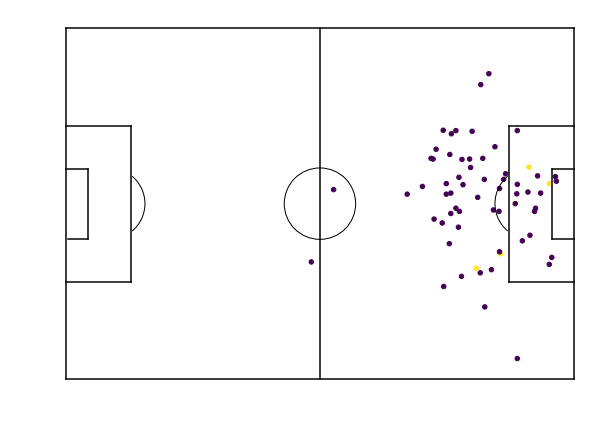

In [186]:
%matplotlib inline
ax = createPitch()
df["x"] = df["x"]*1.3
df["y"] = df["y"]*0.9
df[["x","y","isGoal","isShot"]][df["isShot"] == True].fillna(False).plot.scatter(x="x",y="y",c="isGoal",ax=ax,figsize=(10,20),colorbar=False,colormap="viridis")
ax.set_aspect("equal")
plt.show()


In [154]:
df["wsMatchId"]

0      969899
1      969899
2      969899
3      969899
4      969910
5      969910
6      969910
7      969918
8      969918
9      969918
10     969918
11     969967
12    1090795
13    1090801
14    1090852
15    1090852
16    1090862
17    1090870
18    1090898
19    1090909
20    1090909
21    1090912
22    1090957
23    1090958
24    1090958
25    1091011
26    1091011
27    1091017
28    1091038
29    1091120
       ...   
35    1201865
36    1201865
37    1201932
38    1201932
39    1201941
40    1201941
41    1201941
42    1202010
43    1202028
44    1202028
45    1202028
46    1202028
47    1202035
48    1202054
49    1202054
50    1202060
51    1202060
52    1202063
53    1202063
54    1202063
55    1202068
56    1202068
57    1202086
58    1202106
59    1202112
60    1202112
61    1202115
62    1202133
63    1202133
64    1294556
Name: wsMatchId, Length: 65, dtype: int64

In [125]:
def calculateMinutes(c):
    
    maxMinute = np.max([i["expandedMinute"] for i in c])

    starters = []
    subs = {}
    for i in c:

        try:
            if (i["type"]["displayName"] == "FormationSet"):

                for q in i["qualifiers"]:
                    if q["type"]["displayName"] == "InvolvedPlayers":

                        starters.extend(list(map(int,q["value"].split(",")))[0:11])
            elif (i["type"]["displayName"] == "SubstitutionOn"):
                 subs[i["playerId"]] = maxMinute - i["expandedMinute"]
                 subs[i["relatedPlayerId"]] = i["expandedMinute"]

            else:
                continue
        except:
            print("error")
            continue


    players = {k:maxMinute for k in starters}
    players.update(subs)


    return players

In [76]:
calculateMinutes(list(DB["events"].find({"wsMatchId":969826})))

{47: 95,
 879: 33,
 2339: 62,
 2352: 95,
 2494: 95,
 2602: 95,
 3929: 95,
 4203: 75,
 4387: 95,
 5881: 48,
 6319: 95,
 6687: 95,
 6967: 70,
 7829: 20,
 8943: 25,
 9255: 95,
 9418: 95,
 9446: 95,
 11118: 95,
 14102: 86,
 23757: 39,
 23957: 47,
 25363: 95,
 29571: 95,
 31388: 56,
 33724: 95,
 35202: 95,
 106868: 9}

In [170]:
c = list(DB["matches"].find())

In [177]:
pd.DataFrame(c)

ValueError: DataFrame constructor not properly called!

In [111]:
mins = [i["expandedMinute"] for i in c]

In [114]:
np.max(mins)

96

In [128]:
c[3]

{'_id': ObjectId('5b98293c2607a5029bb4f829'),
 'endX': 37.7,
 'endY': 48.3,
 'eventId': 4,
 'expandedMinute': 0,
 'id': 1623193658.0,
 'isTouch': True,
 'minute': 0,
 'outcomeType': {'displayName': 'Successful', 'value': 1},
 'period': {'displayName': 'FirstHalf', 'value': 1},
 'playerId': 1106,
 'qualifiers': [{'type': {'displayName': 'Zone', 'value': 56},
   'value': 'Back'},
  {'type': {'displayName': 'PassEndX', 'value': 140}, 'value': '37.7'},
  {'type': {'displayName': 'PassEndY', 'value': 141}, 'value': '48.3'}],
 'satisfiedEventsTypes': [90, 116, 29, 34, 36, 215, 216],
 'second': 5,
 'teamId': 52,
 'type': {'displayName': 'Pass', 'value': 1},
 'wsEventId': '3349671623193658.0',
 'wsMatchId': 334967,
 'x': 53.0,
 'y': 46.6}

In [153]:
maxMinute = np.max([i["expandedMinute"] for i in c])

starters = []
subs = {}
for i in c:
    
    try:
        if (i["type"]["displayName"] == "FormationSet"):
            
            for q in i["qualifiers"]:
                if q["type"]["displayName"] == "InvolvedPlayers":
                    
                    starters.extend(list(map(int,q["value"].split(",")))[0:11])
        elif (i["type"]["displayName"] == "SubstitutionOn"):
             subs[i["playerId"]] = maxMinute - i["expandedMinute"]
             subs[i["relatedPlayerId"]] = i["expandedMinute"]
                
        else:
            continue
    except:
        print("error")
        continue


players = {k:maxMinute for k in starters}
players.update(subs)


return players
        
    
        

In [157]:
pd.Series(players,name="minutesPlayed")

1063     12
1106     64
1141     70
1688     26
2187     22
2776     96
3172     96
3577     84
4961     96
5583     96
9257     96
9283     96
10051    74
11104    96
12575    96
14079    96
14100    31
14258    96
14296    74
17106    96
18285    96
19729    22
20241    96
21019    96
22152    96
23693    65
23758    32
34045    96
Name: minutesPlayed, dtype: int64

In [147]:
starters.update(subs)

In [149]:
len(starters.keys())

28

In [105]:
players

'2776,11104,20241,4961,12575,14079,5583,18285,14296,3577,1106,17651,1063,23170,19729,2288,23758,3403'

In [116]:
subs

[{'_id': ObjectId('5b98293c2607a5029bb4fbbc'),
  'eventId': 551,
  'expandedMinute': 64,
  'id': 272165828.0,
  'isTouch': False,
  'minute': 62,
  'outcomeType': {'displayName': 'Successful', 'value': 1},
  'period': {'displayName': 'SecondHalf', 'value': 2},
  'playerId': 23758,
  'qualifiers': [{'type': {'displayName': 'RelatedEventId', 'value': 55},
    'value': '550'},
   {'type': {'displayName': 'FormationSlot', 'value': 145}, 'value': '11'},
   {'type': {'displayName': 'JerseyNumber', 'value': 59}, 'value': '24'},
   {'type': {'displayName': 'PlayerPosition', 'value': 44},
    'value': 'Midfielder'}],
  'relatedEventId': 550,
  'relatedPlayerId': 1106,
  'satisfiedEventsTypes': [212],
  'second': 10,
  'teamId': 52,
  'type': {'displayName': 'SubstitutionOn', 'value': 19},
  'wsEventId': '334967272165828.0',
  'wsMatchId': 334967,
  'x': 0.0,
  'y': 0.0},
 {'_id': ObjectId('5b98293c2607a5029bb4fbd3'),
  'eventId': 469,
  'expandedMinute': 65,
  'id': 695742947.0,
  'isTouch': Fa

In [119]:
a = list(map(int,players.split(",")))[0:11]

In [118]:
aaa = []

In [120]:
aaa.extend(a)

In [121]:
aaa

[2776, 11104, 20241, 4961, 12575, 14079, 5583, 18285, 14296, 3577, 1106]

In [69]:
aaa = sorted(DB["events"].distinct("type.displayName"))

In [71]:
lista = []

for i in c:
    
    d = {}
    
    

[{'_id': ObjectId('5b98293c2607a5029bb4f826'),
  'eventId': 2,
  'expandedMinute': 0,
  'id': 1163992171.0,
  'isTouch': False,
  'minute': 0,
  'outcomeType': {'displayName': 'Successful', 'value': 1},
  'period': {'displayName': 'FirstHalf', 'value': 1},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'second': 0,
  'teamId': 59,
  'type': {'displayName': 'Start', 'value': 32},
  'wsEventId': '3349671163992171.0',
  'wsMatchId': 334967,
  'x': 0.0,
  'y': 0.0},
 {'_id': ObjectId('5b98293c2607a5029bb4f827'),
  'eventId': 2,
  'expandedMinute': 0,
  'id': 1996244779.0,
  'isTouch': False,
  'minute': 0,
  'outcomeType': {'displayName': 'Successful', 'value': 1},
  'period': {'displayName': 'FirstHalf', 'value': 1},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'second': 0,
  'teamId': 52,
  'type': {'displayName': 'Start', 'value': 32},
  'wsEventId': '3349671996244779.0',
  'wsMatchId': 334967,
  'x': 0.0,
  'y': 0.0},
 {'_id': ObjectId('5b98293c2607a5029bb4f828'),
  'endX':

In [70]:
aaa

['Aerial',
 'BallRecovery',
 'BallTouch',
 'BlockedPass',
 'Card',
 'Challenge',
 'ChanceMissed',
 'Claim',
 'Clearance',
 'CornerAwarded',
 'CrossNotClaimed',
 'Dispossessed',
 'End',
 'Error',
 'FormationChange',
 'FormationSet',
 'Foul',
 'Goal',
 'GoodSkill',
 'Interception',
 'KeeperPickup',
 'KeeperSweeper',
 'MissedShots',
 'OffsideGiven',
 'OffsidePass',
 'OffsideProvoked',
 'Pass',
 'PenaltyFaced',
 'Punch',
 'Save',
 'SavedShot',
 'ShieldBallOpp',
 'ShotOnPost',
 'Smother',
 'Start',
 'SubstitutionOff',
 'SubstitutionOn',
 'Tackle',
 'TakeOn',
 'Turnover']

In [34]:

    
lista = [{"id":i["_id"],
        "minute":i["expandedMinute"]} for i in DB["events"].find({"wsMatchId":{"$in":ids}})]
    

In [ ]:
DB["matches"].find({"wsMatchId":c[0]["wsMatchId"]})[0]

In [3]:
DB["events"].find({"type.displayName":"Pass"})[1]["qualifiers"]

[{'type': {'displayName': 'PassEndY', 'value': 141}, 'value': '49.2'},
 {'type': {'displayName': 'Angle', 'value': 213}, 'value': '3.2'},
 {'type': {'displayName': 'Zone', 'value': 56}, 'value': 'Back'},
 {'type': {'displayName': 'PassEndX', 'value': 140}, 'value': '29.8'},
 {'type': {'displayName': 'Length', 'value': 212}, 'value': '22.5'}]

In [34]:
pd.to_datetime(DB["matches"].find_one()["date"])

Timestamp('2018-08-12 15:00:00')

In [5]:
class Match():
    
    def __init__(self,matchid,league,season,jsonpath=JSONPATH):
        
        self.league = league
        self.season = season
        self.leaguename = self.league.lower().replace(" ","_")
        self.matchid = matchid
        self.jsonpath = jsonpath
        self.matchpath = jsonpath+self.leaguename+"/"+self.season+"/"+str(self.matchid)+".json"
        self.match = json.load(open(self.matchpath,"r",encoding="utf-8"),encoding="utf-8")
        
        self.__matchInfo__()
        self.__events__()
        self.__players__()
        self.__teams__()
        
    def __matchInfo__(self):
        
        matches_dict = {}
        
        try:
            matches_dict["wsmatchid"] = self.matchid
        except KeyError:
            matches_dict["wsmatchid"] = np.nan
        try:
            matches_dict["league"] = self.league
        except KeyError:
            matches_dict["league"] = np.nan
        try:
            matches_dict["season"] = self.season
        except KeyError:
            matches_dict["season"] = np.nan
        try:
            matches_dict["date"] = pd.to_datetime(self.match["startTime"].replace("T"," "))
        except KeyError:
            matches_dict["date"] = np.nan
        try:
            matches_dict["hometeamid"] = self.match["home"]["teamId"]
        except KeyError:
            matches_dict["hometeamid"] = np.nan
        try:
            matches_dict["awayteamid"] = self.match["away"]["teamId"]
        except KeyError:
            matches_dict["awayteamid"] = np.nan
        try:
            matches_dict["hometeamname"] = self.match["home"]["name"]
        except KeyError:
            matches_dict["hometeamname"] = np.nan
        try:
            matches_dict["awayteamname"] = self.match["away"]["name"]
        except KeyError:
            matches_dict["awayteamname"] = np.nan
        try:
            matches_dict["homescore"] = self.match["score"].split(" : ")[0]
        except KeyError:
            matches_dict["homescore"] = np.nan
        try:
            matches_dict["awayscore"] = self.match["score"].split(" : ")[1]
        except KeyError:
            matches_dict["awayscore"] = np.nan
        try:
            if self.match["pkScore"] == '':
                matches_dict["homepkscore"] = np.nan
                matches_dict["awaypkscore"] = np.nan
            else:
                matches_dict["homepkscore"] = self.match["pkScore"].split(" : ")[0]
                matches_dict["awaypkscore"] = self.match["pkScore"].split(" : ")[1]
        except KeyError:
            matches_dict["homepkscore"] = np.nan
            matches_dict["awaypkscore"] = np.nan
        try:
            matches_dict["referee"] = self.match["referee"]["name"]
        except KeyError:
            matches_dict["referee"] = np.nan
        try:
            matches_dict["managerhome"] = self.match["home"]["managerName"]
        except KeyError:
            matches_dict["managerhome"] = np.nan
        try:
            matches_dict["manageraway"] = self.match["away"]["managerName"]
        except KeyError:
            matches_dict["manageraway"] = np.nan
        try:
            matches_dict["attendance"] = self.match["attendance"]
        except KeyError:
            matches_dict["attendance"] = np.nan
        try:
            matches_dict["venuename"] = self.match["venueName"]
        except KeyError:
            matches_dict["venuename"] = np.nan
        
        column_order = ["wsmatchid","league","season","date","hometeamid",
                        "awayteamid","hometeamname","awayteamname","homescore",
                        "awayscore","homepkscore","awaypkscore","referee",
                        "managerhome","manageraway","attendance","venuename"]
        
        self.matchinfo = pd.Series(matches_dict)[column_order]
        
        #return self.matchinfo
    
    def __events__(self):
            
        events = self.match["events"]
        event_list=[]
        qual_list=[]

        for event in events:
            events_dict = {}
            try:
                events_dict["keyid"] = str(self.matchid)+str(event["id"])
            except KeyError:
                events_dict["keyid"] = np.nan
            try:
                events_dict["wsmatchid"] = self.matchid
            except KeyError:
                events_dict["wsmatchid"] = np.nan
            try:
                events_dict["wseventid"] = str(event["id"])
            except KeyError:
                events_dict["wseventid"] = np.nan
            try:
                events_dict["matcheventid"] = event["eventId"]
            except KeyError:
                events_dict["matcheventid"] = np.nan
            try:
                events_dict["minute"] = event["minute"]
            except KeyError:
                events_dict["minute"] = np.nan
            try:
                events_dict["second"] = event["second"]
            except KeyError:
                events_dict["second"] = np.nan
            try:
                events_dict["expandedminute"] = event["expandedMinute"]
            except KeyError:
                events_dict["expandedminute"] = np.nan
            try:
                events_dict["teamid"] = event["teamId"]
            except KeyError:
                events_dict["teamid"] = np.nan
            try:
                events_dict["playerid"] = event["playerId"]
            except KeyError:
                events_dict["playerid"] = np.nan
            try:
                events_dict["period"] = event["period"]["displayName"]
            except KeyError:
                events_dict["period"] = np.nan
            try:
                events_dict["typeid"] = event["type"]["value"]
            except KeyError:
                events_dict["typeid"] = np.nan
            try:
                events_dict["type"] = event["type"]["displayName"]
            except KeyError:
                events_dict["type"] = np.nan
            try:
                events_dict["outcometype"] = event["outcomeType"]["displayName"]
            except KeyError:
                events_dict["outcometype"] = np.nan
            try:
                events_dict["x"] = event["x"]
            except KeyError:
                events_dict["x"] = np.nan
            try:
                events_dict["y"] = event["y"]
            except KeyError:
                events_dict["y"] = np.nan

            event_list.append(events_dict)

            qualifiers = event["qualifiers"]
            
            for qualifier in qualifiers:
                    qual_dict = {}
                    try:
                        qual_dict["keyid"] = events_dict["keyid"]
                    except KeyError:
                        qual_dict["keyid"] = np.nan
                    try:
                        qual_dict["wsmatchid"] = self.matchid
                    except KeyError:
                        qual_dict["wsmatchid"] = np.nan
                    try:
                        qual_dict["wseventid"] = events_dict["wseventid"]
                    except KeyError:
                        qual_dict["wseventid"] = np.nan
                    try:
                        qual_dict["matcheventid"] = events_dict["matcheventid"]
                    except KeyError:
                        qual_dict["matcheventid"] = np.nan
                    try:
                        qual_dict["qualid"] = qualifier["type"]["value"]
                    except KeyError:
                        qual_dict["qualid"] = np.nan
                    try:
                        qual_dict["qualname"] = qualifier["type"]["displayName"]
                    except KeyError:
                        qual_dict["qualname"] = np.nan
                    try:
                        try:
                            value = float(qualifier["value"])
                        except ValueError:
                            value = qualifier["value"]
                        if type(value) == str:
                            qual_dict["qualvaluetext"] = value
                            qual_dict["qualvalue"] = np.nan
                        else:
                            qual_dict["qualvaluetext"] = np.nan
                            qual_dict["qualvalue"] = value    
                    except KeyError:
                        qual_dict["qualvalue"] = 1
                        qual_dict["qualvaluetext"] = np.nan
                    qual_list.append(qual_dict)
    
        self.events = pd.DataFrame(event_list)[["keyid","wsmatchid","wseventid","matcheventid","minute","second","expandedminute","teamid",
                                   "playerid","period","typeid","type","outcometype","x","y"]].set_index("keyid")
        
        self.qualifiers = pd.DataFrame(qual_list)[["keyid","wsmatchid","wseventid","matcheventid","qualid","qualname","qualvalue","qualvaluetext"]].set_index("keyid")
        
        #return self.events, self.qualifiers
        
        
        
    def __players__(self):
        
        dic = [{"playerid":k,"playername":v} for k,v in self.match["playerIdNameDictionary"].items()]
        self.players = pd.DataFrame(dic,index=range(len(dic))).set_index("playerid")
        
        #return self.players
        
    def __teams__(self):
        
        d = {"home":{"teamid":self.matchinfo["hometeamid"],
                "teamname":self.matchinfo["hometeamname"]},
         
        "away":{"teamid":self.matchinfo["awayteamid"],
                "teamname":self.matchinfo["awayteamname"]}}
        
        self.teams = pd.DataFrame(d).T
        
        #return self.teams
        

In [7]:
m = le.importMatch(le.matcheslists["2017-2018"][12])

In [15]:
pd.unique(m.events["period"])

array(['FirstHalf', 'SecondHalf', 'PostGame', 'PreMatch'], dtype=object)

In [8]:
m.match["events"][3]

{'endX': 38.9,
 'endY': 49.9,
 'eventId': 4,
 'expandedMinute': 0,
 'id': 1807661006.0,
 'isTouch': True,
 'minute': 0,
 'outcomeType': {'displayName': 'Successful', 'value': 1},
 'period': {'displayName': 'FirstHalf', 'value': 1},
 'playerId': 14546,
 'qualifiers': [{'type': {'displayName': 'PassEndX', 'value': 140},
   'value': '38.9'},
  {'type': {'displayName': 'Zone', 'value': 56}, 'value': 'Back'},
  {'type': {'displayName': 'Angle', 'value': 213}, 'value': '3.1'},
  {'type': {'displayName': 'PassEndY', 'value': 141}, 'value': '49.9'},
  {'type': {'displayName': 'Length', 'value': 212}, 'value': '11.0'}],
 'satisfiedEventsTypes': [90, 116, 29, 34, 36, 215, 217],
 'second': 2,
 'teamId': 903,
 'type': {'displayName': 'Pass', 'value': 1},
 'x': 49.4,
 'y': 49.1}

In [10]:
import datetime

In [11]:
m.events

,wsmatchid,wseventid,matcheventid,minute,second,expandedminute,teamid,playerid,period,typeid,type,outcometype,x,y
keyid,,,,,,,,,,,,,,
12314211588429394.0,1231421,1588429394.0,2.0,0,0.0,0,6147,NaN,FirstHalf,32,Start,Successful,0.0,0.0
12314211437274719.0,1231421,1437274719.0,2.0,0,0.0,0,896,NaN,FirstHalf,32,Start,Successful,0.0,0.0
12314212061939547.0,1231421,2061939547.0,5.0,0,1.0,0,6147,91574.0,FirstHalf,1,Pass,Successful,49.9,50.7
12314211146880972.0,1231421,1146880972.0,6.0,0,2.0,0,6147,303656.0,FirstHalf,1,Pass,Successful,33.5,49.7
12314211581883914.0,1231421,1581883914.0,7.0,0,5.0,0,6147,125444.0,FirstHalf,1,Pass,Successful,27.1,24.8
12314211346966372.0,1231421,1346966372.0,8.0,0,8.0,0,6147,126079.0,FirstHalf,1,Pass,Successful,40.5,18.0
12314211322744539.0,1231421,1322744539.0,9.0,0,10.0,0,6147,126186.0,FirstHalf,1,Pass,Successful,33.5,6.0
12314211617717134.0,1231421,1617717134.0,10.0,0,12.0,0,6147,125498.0,FirstHalf,1,Pass,Unsuccessful,39.7,22.3
12314211318024005.0,1231421,1318024005.0,846.0,0,13.0,0,896,68939.0,FirstHalf,61,BallTouch,Unsuccessful,34.9,76.9


In [33]:
datetime.timedelta(minutes=1,seconds=60).total_seconds()

120.0

In [16]:
m.events.apply(lambda x: datetime.timedelta(seconds=x.second))

AttributeError: ("'Series' object has no attribute 'second'", 'occurred at index wsmatchid')

In [26]:
np.unique([i["type"]["displayName"] for i in m.match["events"]])

array(['Aerial', 'BallRecovery', 'BallTouch', 'BlockedPass', 'Card',
       'Challenge', 'Clearance', 'CornerAwarded', 'Dispossessed', 'End',
       'Error', 'FormationChange', 'FormationSet', 'Foul', 'Goal',
       'Interception', 'KeeperPickup', 'MissedShots', 'OffsideGiven',
       'OffsidePass', 'OffsideProvoked', 'Pass', 'PenaltyFaced', 'Punch',
       'Save', 'SavedShot', 'ShotOnPost', 'Start', 'SubstitutionOff',
       'SubstitutionOn', 'Tackle', 'TakeOn'],
      dtype='<U15')

In [6]:
from pymongo import MongoClient

In [7]:
c = MongoClient()

In [13]:
c.drop_database("football")

In [8]:
c.database_names()

['admin', 'local']

In [13]:
db = c["football"]

In [17]:
db["teams"]

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'football'), 'teams')

In [19]:
teams = db["teams"]

In [31]:
for matchid in le.matcheslists["2017-2018"]:
    
    match = le.getMatch(matchid)
    
    team1 = {"teamId":match.match["home"]["teamId"],
            "teamName":match.match["home"]["name"],
            }
    team2 = {"teamId":match.match["away"]["teamId"],
            "teamName":match.match["away"]["name"],
            }
    
    if teams.count({"teamId":team1["teamId"]}) == 0:
        teams.insert(team1)
        print("team inserted")

/Users/cgnal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  del sys.path[0]


team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted
team inserted


In [45]:
for matchid in le.matcheslists["2017-2018"]:
    
    match = le.getMatch(matchid).match

    teams.update_one({'teamId': match['home']['teamId']}, 
                     {'$setOnInsert': {'teamName': match['home']['name']}}, upsert=True)
    teams.update_one({'teamId': match['away']['teamId']}, 
                     {'$setOnInsert': {'teamName': match['away']['name']}}, upsert=True)
    
    for k,v in match["playerIdNameDictionary"].items():
        
         db["players"].update_one({"playerId":int(k)},
                                 {'$setOnInsert': {'playerName': v}}, upsert=True)
        
        

In [52]:
teams.find_one({"teamName":"Boca Juniors"})["teamId"]

889

In [51]:
str(db["players"].find_one()["_id"])

'5b979bdb7425c3424643aa92'

In [48]:
match.keys()

dict_keys(['playerIdNameDictionary', 'periodMinuteLimits', 'timeStamp', 'attendance', 'venueName', 'referee', 'weatherCode', 'elapsed', 'startTime', 'startDate', 'score', 'htScore', 'ftScore', 'etScore', 'pkScore', 'statusCode', 'periodCode', 'home', 'away', 'maxMinute', 'minuteExpanded', 'maxPeriod', 'expandedMinutes', 'expandedMaxMinute', 'periodEndMinutes', 'commonEvents', 'events', 'timeoutInSeconds'])

In [59]:
match["startTime"]

'2017-09-24T18:05:00'

In [61]:
match["home"].keys()

dict_keys(['teamId', 'formations', 'stats', 'incidentEvents', 'shotZones', 'name', 'countryName', 'players', 'managerName', 'scores', 'field', 'averageAge'])

In [11]:
match["events"][1]

NameError: name 'match' is not defined

In [147]:
import requests
r = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/7298.json')

In [149]:
f = r.json()

In [152]:
pd.DataFrame(f)

,bad_behaviour,ball_receipt,ball_recovery,block,dribble,duel,duration,foul_committed,foul_won,goalkeeper,...,possession_team,related_events,second,shot,substitution,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,...,"{'id': 746, 'name': 'Manchester City WFC'}",NaN,0,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...","{'id': 746, 'name': 'Manchester City WFC'}",00:00:00.000,"{'id': 35, 'name': 'Starting XI'}",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,...,"{'id': 746, 'name': 'Manchester City WFC'}",NaN,0,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...","{'id': 745, 'name': 'Chelsea LFC'}",00:00:00.000,"{'id': 35, 'name': 'Starting XI'}",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,8.160,NaN,NaN,NaN,...,"{'id': 746, 'name': 'Manchester City WFC'}",[0c9ba151-f220-4b4b-bac1-948e9e396ab0],0,NaN,NaN,NaN,"{'id': 745, 'name': 'Chelsea LFC'}",00:00:00.000,"{'id': 18, 'name': 'Half Start'}",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,7.960,NaN,NaN,NaN,...,"{'id': 746, 'name': 'Manchester City WFC'}",[f8bdb5ec-8476-4070-b246-6ac94c643c14],0,NaN,NaN,NaN,"{'id': 746, 'name': 'Manchester City WFC'}",00:00:00.000,"{'id': 18, 'name': 'Half Start'}",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,...,"{'id': 745, 'name': 'Chelsea LFC'}",[75bf2abe-0d3b-416b-9a83-445e715f6ea3],0,NaN,NaN,NaN,"{'id': 745, 'name': 'Chelsea LFC'}",00:00:00.100,"{'id': 30, 'name': 'Pass'}",NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'id': 745, 'name': 'Chelsea LFC'}",[e02a9881-b244-4844-a3db-9df947ec1b09],0,NaN,NaN,NaN,"{'id': 745, 'name': 'Chelsea LFC'}",00:00:00.100,"{'id': 42, 'name': 'Ball Receipt*'}",NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.373,NaN,NaN,NaN,...,"{'id': 745, 'name': 'Chelsea LFC'}",[96f069fb-7ae4-443c-a4a6-182ea5f3691a],0,NaN,NaN,NaN,"{'id': 746, 'name': 'Manchester City WFC'}",00:00:00.340,"{'id': 17, 'name': 'Pressure'}",NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1.640,NaN,NaN,NaN,...,"{'id': 745, 'name': 'Chelsea LFC'}","[0a8333e3-7b99-420e-8b18-2895be4e16e5, 2073010...",0,NaN,NaN,NaN,"{'id': 745, 'name': 'Chelsea LFC'}",00:00:00.500,"{'id': 30, 'name': 'Pass'}",True
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'id': 745, 'name': 'Chelsea LFC'}",[96f069fb-7ae4-443c-a4a6-182ea5f3691a],2,NaN,NaN,NaN,"{'id': 745, 'name': 'Chelsea LFC'}",00:00:02.140,"{'id': 42, 'name': 'Ball Receipt*'}",NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,0.733,NaN,NaN,NaN,...,"{'id': 745, 'name': 'Chelsea LFC'}",NaN,2,NaN,NaN,NaN,"{'id': 746, 'name': 'Manchester City WFC'}",00:00:02.700,"{'id': 17, 'name': 'Pressure'}",NaN
